In [19]:
import os
import io
import sys
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score

from neural_network.network import NeuralNetwork


In [20]:
df = pd.read_csv('./data/data.csv')

In [21]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [5]:
X = np.array(df.drop('diagnosis',axis=1))

y = np.array(df.diagnosis)

In [6]:
le = LabelEncoder()
y = le.fit_transform(y)

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=40)

In [8]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
Y_train = Y_train.reshape(len(Y_train), 1)
Y_test = Y_test.reshape(len(Y_test), 1)

In [14]:
epochs = 80

model = NeuralNetwork(X_train.shape[1],
                      [
                       (6, "ReLU"),
                       (2, "ReLU"),
                       (1, "sigmoid"),
                      ],
                       0.0005)
model.create_network()

print(model.architecture)

losses = {'train':[], 'validation':[]}
for epoch in range(epochs):
    # Go through a random batch of 128 records from the training data set
    # batch = np.random.choice(X_train.index, size=128)
    # X, y = X_train.ix[batch].values, train_targets.ix[batch]['cnt']

    network_output, train_loss = model.train(X_train, Y_train)

    # Printing out the training progress
    # train_loss = loss(Y_train, y_pred)

    # val_loss = MSE(network.run(val_features).T, val_targets['cnt'].values)
    print("\rProgress: {:2.1f}".format(100 * epoch/float(epochs))
                     + "% ... Training loss: " + str(train_loss)
                    #  + " ... Validation loss: " + str(val_loss)[:5]
                     )
    # sys.stdout.flush()

    losses['train'].append(train_loss)
    # losses['validation'].append(val_loss)

[{'input_dim': 30, 'output_dim': 6, 'activation': 'ReLU'}, {'input_dim': 6, 'output_dim': 2, 'activation': 'ReLU'}, {'input_dim': 2, 'output_dim': 1, 'activation': 'sigmoid'}]
Progress: 0.0% ... Training loss: 0.7271895381232945
Progress: 1.2% ... Training loss: 0.7265985837465349
Progress: 2.5% ... Training loss: 0.7260344627600613
Progress: 3.8% ... Training loss: 0.7254940297583798
Progress: 5.0% ... Training loss: 0.7249760267272295
Progress: 6.2% ... Training loss: 0.7244794841231377
Progress: 7.5% ... Training loss: 0.7239908018232998
Progress: 8.8% ... Training loss: 0.7235214883148068
Progress: 10.0% ... Training loss: 0.723070967597339
Progress: 11.2% ... Training loss: 0.7226380726062314
Progress: 12.5% ... Training loss: 0.7222220264386586
Progress: 13.8% ... Training loss: 0.7218282426289709
Progress: 15.0% ... Training loss: 0.7214533025402396
Progress: 16.2% ... Training loss: 0.7210902370665528
Progress: 17.5% ... Training loss: 0.7207325817444169
Progress: 18.8% ... Tra

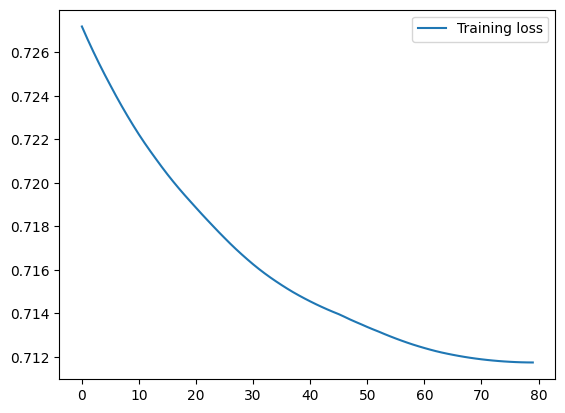

In [15]:
plt.plot(losses['train'], label='Training loss')
# plt.plot(losses['validation'], label='Validation loss')
plt.legend()
_ = plt.ylim()

In [16]:
y_pred = (network_output>0.5).astype(int)
accuracy_score(y_pred, Y_train)

0.6483516483516484

In [18]:
predictions = model.feed_forward(X_test)
predictions = (predictions>0.5).astype(int)
accuracy_score(predictions, Y_test)

0.6578947368421053